# Projeto KNN


Neste projeto iremos trabalhar com o Iris dataset (iris.csv). Este é composto por 4 atributos (Comprimento e largura das sépalas e pétalas) de 150 amostras, sendo estas divididas em três espécies de iris (Setosa, Virginica e versicolor).

O objetivo é construir um modelo para classificar a espécie de iris.


## Importar bibliotecas

** Importe algumas bibliotecas necessárias - numpy, matplotlib, seaborn e pandas**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregar o DataSet para um DataFrame Pandas

In [3]:
df = pd.read_csv("iris.csv")

## Análise exploratória de dados

Imprima os 5 primeiros registos do DataFrame

In [4]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Visualize o relacionamento dos dados através de um pairplot.

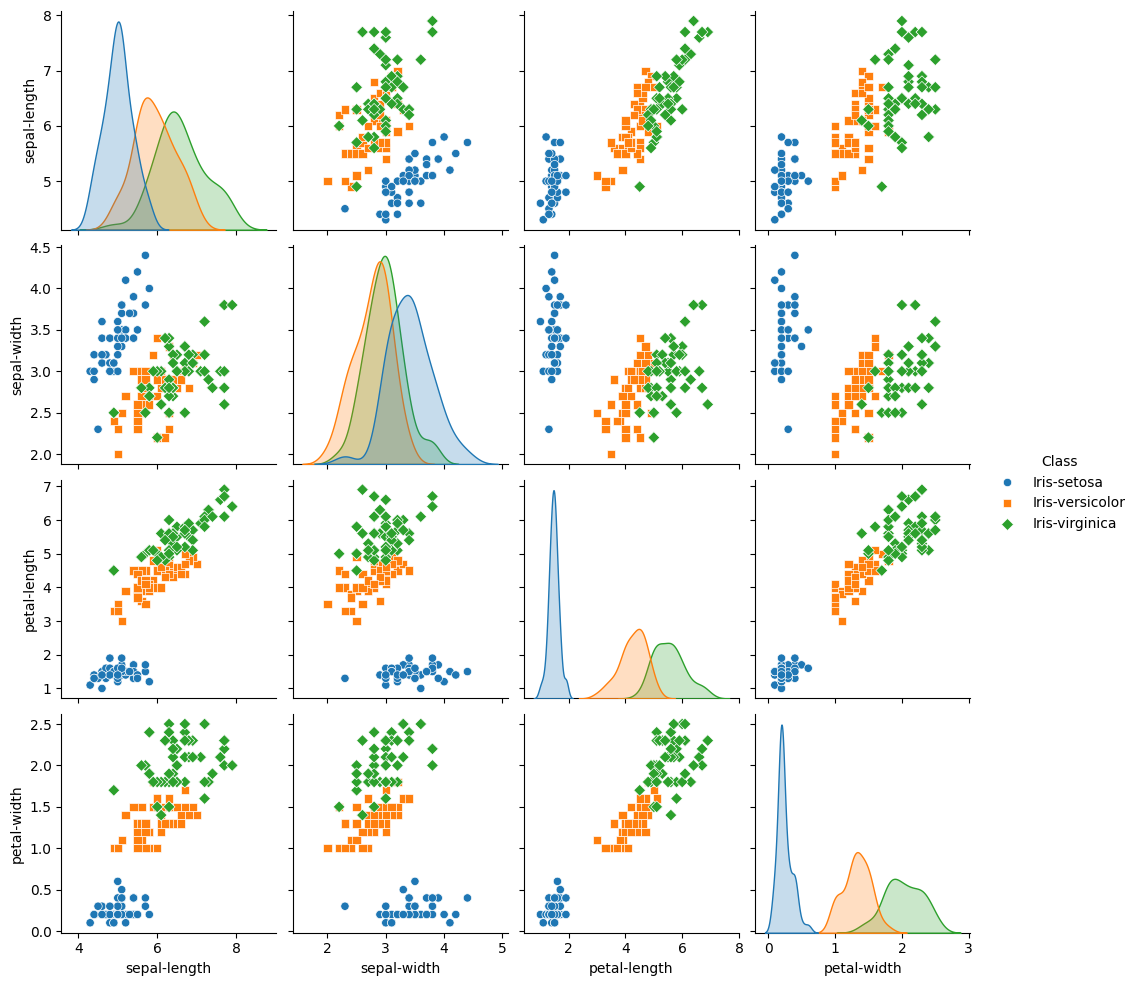

In [5]:
sns.pairplot(df, hue="Class", markers=["o", "s", "D"])

plt.show()

## Codificar colunas de dados 

Utilize o Label Encoder do sklearn para efetuar o mapeamento das colunas de dados categóricos em dados numéricos. Neste caso, apenas a coluna 'Class' contém dados categóricos.

No final, imprima a coluna 'Class' com os dados codificados.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Criar um objeto LabelEncoder
encoder = LabelEncoder()

# Aplicar a transformação na coluna "Class"
df["Class"] = encoder.fit_transform(df["Class"])

# Exibir os valores únicos codificados
print("Valores únicos codificados para a coluna 'Class':")
print(df["Class"].unique())

# Exibir os primeiros registos da coluna codificada
df.head()


# class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
# print("Mapeamento das classes:", class_mapping)

Valores únicos codificados para a coluna 'Class':
[0 1 2]


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Divisão dos dados

Divida os dados num conjunto de dados de treino e de teste.

O test_size deverá ser 0.3 e o random_state 101.

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)  
y = df["Class"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"Tamanho do conjunto de treino (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Tamanho do conjunto de teste (X_test, y_test): {X_test.shape}, {y_test.shape}")

Tamanho do conjunto de treino (X_train, y_train): (105, 4), (105,)
Tamanho do conjunto de teste (X_test, y_test): (45, 4), (45,)


## Gerar o modelo KNN com K=2

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cria o modelo KNN com K=2
knn = KNeighborsClassifier(n_neighbors=2)

# Treina o modelo
knn.fit(X_train, y_train)

# Faz as previsões com o conjunto de teste
y_pred = knn.predict(X_test)

# Calcula a precisão
accuracy = accuracy_score(y_test, y_pred)


print(f"Precisão com K=2: {accuracy}")

Precisão com K=2: 0.9555555555555556


# Avaliação do modelo para K=2

Avalie o modelo gerado com K=2, calculando a 'Accuracy'

In [9]:
from sklearn.metrics import accuracy_score

# Calcula a precisão
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisão com K=2: {accuracy}")

Precisão com K=2: 0.9555555555555556


## Escolher o melhor valor para K

Utilize o método Elbow (cotovelo) para escolher um bom Valor para K

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Lista para armazenar as taxas de erro para diferentes valores de K
error_rates = []

# Testar diferentes valores de K
for k in range(1, 21):
    # Criar o modelo KNN com o valor de K atual
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Treinar o modelo
    knn.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred = knn.predict(X_test)
    
    # Calcular a precisão e depois a taxa de erro
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    error_rates.append(error_rate)

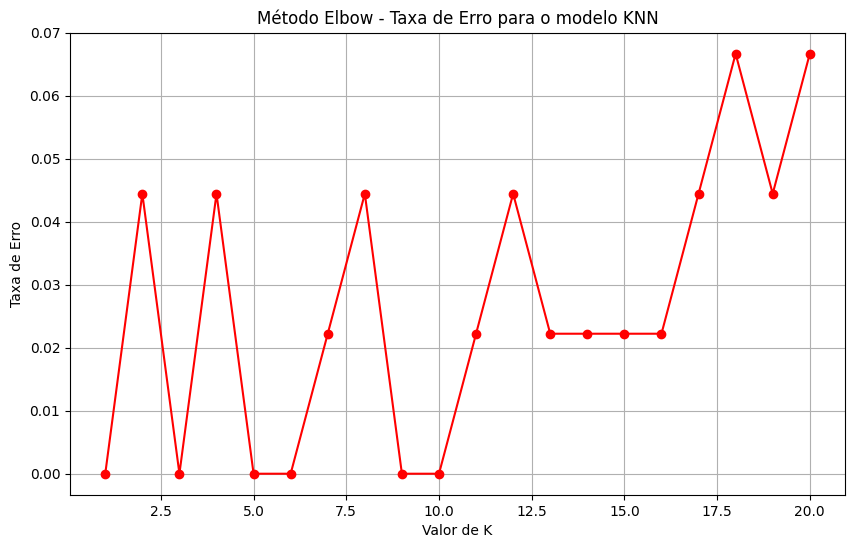

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='-', color='r')
plt.title('Método Elbow - Taxa de Erro para o modelo KNN')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro')
plt.grid(True)
plt.show()

## Treinar o modelo novamente, com o melhor valor para K

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo KNN com o valor de K=10
knn_final = KNeighborsClassifier(n_neighbors=10)

# Treinar o modelo com os dados de treino
knn_final.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_final = knn_final.predict(X_test)

# Calcular a precisão do modelo
accuracy_final = accuracy_score(y_test, y_pred_final)

print(f"Precisão do modelo KNN com K=10: {accuracy_final:.4f}")

Precisão do modelo KNN com K=10: 1.0000


## Avaliação do modelo com o melhor valor para K

Imprima a Confusion Matrix e o Classification Report

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Criar o modelo KNN com K=10
knn_k10 = KNeighborsClassifier(n_neighbors=10)

# Treinar o modelo com os dados de treino
knn_k10.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_k10 = knn_k10.predict(X_test)

# Calcular a precisão
accuracy_k10 = accuracy_score(y_test, y_pred_k10)
print(f"Precisão do modelo KNN com K=10: {accuracy_k10:.4f}")

# Gerar a matriz de confusão
conf_matrix_k10 = confusion_matrix(y_test, y_pred_k10)
print("\nConfusion Matrix (K=10):")
print(conf_matrix_k10)

# Gerar o relatório de classificação
class_report_k10 = classification_report(y_test, y_pred_k10)
print("\nClassification Report (K=10):")
print(class_report_k10)

Precisão do modelo KNN com K=10: 1.0000

Confusion Matrix (K=10):
[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]

Classification Report (K=10):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

